In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./spam.csv', encoding='iso-8859-1')


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Structure
#### 1. Data cleaning
#### 2. EDA
#### 3. Text preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvment
#### 7. Website 
#### 8. Deploy

## 1. data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
data.drop(data.columns[2: 5], axis=1, inplace=True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the cols
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.sample(5)

,target,text
2227,ham,Oh k.k..where did you take test?
2616,ham,I went to ur hon lab but no one is there.
5152,ham,Idk. I'm sitting here in a stop and shop parki...
5285,spam,URGENT! You have won a 1 week FREE membership ...
4596,ham,Full heat pa:-) i have applyed oil pa.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
data.duplicated().sum()

403

In [13]:
# remove duplicated values
data = data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [16]:
data.shape

(5169, 2)

## 2. EDA

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

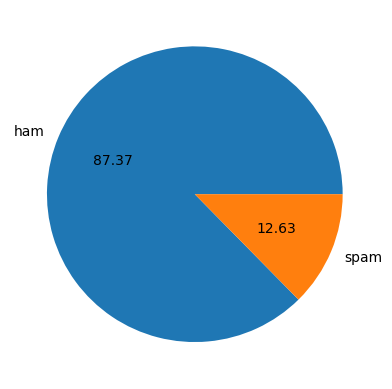

In [19]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [20]:
# data is imbalanced

In [21]:
import nltk 

In [26]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [23]:
data['num_characters'] = data['text'].apply(len)

In [24]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words

data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\HI/nltk_data'
    - 'C:\\Users\\HI\\anaconda3\\nltk_data'
    - 'C:\\Users\\HI\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\HI\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\HI\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************


In [ ]:
data.head()

In [ ]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

In [ ]:
data[['num_characters','num_words','num_sentences']].describe()

In [ ]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

In [ ]:
# spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'], color='red')

In [ ]:
sns.pairplot(data,hue='target')

In [ ]:
sns.heatmap(data.corr(), annot=True)

## 3. Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def text_transform(text) :
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))


    return " ".join(y)


In [ ]:
text_transform("HELLo world I'm good!")

In [ ]:
data['transformed_text'] = data['text'].apply(text_transform)

In [ ]:
data.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))


In [ ]:
plt.imshow(ham_wc)

In [ ]:
data.head()

In [ ]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter

# Count occurrences of each item in the list 'spam_corpus'
freq = dict(Counter(spam_corpus).most_common(30))

# Create a pandas DataFrame from the dictionary 'freq'
df = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})

# Create a barplot using seaborn
sns.barplot(x='Word', y='Frequency', data=df)

plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:

# Count occurrences of each item in the list 'spam_corpus'
freq = dict(Counter(ham_corpus).most_common(30))

# Create a pandas DataFrame from the dictionary 'freq'
df = pd.DataFrame({'Word': list(freq.keys()), 'Frequency': list(freq.values())})

# Create a barplot using seaborn
sns.barplot(x='Word', y='Frequency', data=df)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.head()

## 3. Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
y = data['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_data

In [ ]:
performance_data1 = pd.melt(performance_data, id_vars = "Algorithm")

In [ ]:
performance_data1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_data = performance_data.merge(temp_data,on='Algorithm')

In [ ]:
new_data_scaled = new_data.merge(temp_data,on='Algorithm')

In [ ]:
temp_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_data_scaled.merge(temp_data,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))